
# Summarization 模型对比实验（中英混合输入）

本实验对比以下 2 个主流文本摘要模型在中文、英文与中英混合文本下的表现差异：

| 模型名 | 语言 | 架构 | 模型路径 |
|--------|------|------|-----------|
| BART-large-CNN | 英文 | BART | `facebook/bart-large-cnn` |
| t5-base | 英文 | t5-base | `t5-base` |

测试文本包含：
- 中文文本
- 英文文本
- 中英混合文本

评估对比内容：
- 模型摘要输出
- 推理耗时


In [1]:

import time
import pandas as pd
from transformers import pipeline
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import numpy as np
# 设置中文字体（适配 matplotlib）
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:

MODELS = {
    "BART 英文": "facebook/bart-large-cnn",
    "Pegasus 英文": "t5-base"
}


In [3]:

TEXTS = {
    "中文": "中国的首都是北京，北京是中国的政治、文化中心，也是历史文化名城，拥有众多名胜古迹。",
    "英文": "Beijing is the capital of China. It is a city with a long history and many cultural heritages.",
    "中英混合": "中国的首都是北京. Beijing is known for its Forbidden City and Great Wall."
}


In [4]:

results = []

for model_name, model_path in MODELS.items():
    summarizer = pipeline("summarization", model=model_path)
    for lang, text in TEXTS.items():
        start = time.time()
        try:
            tokens = len(text.split())
            max_len = min(60, int(tokens * 0.8) + 5)  # 输出大致比输入短一点
            summary = summarizer(text, max_length=max_len, min_length=10, do_sample=False)[0]["summary_text"]
        except Exception as e:
            summary = f"[ERROR] {str(e)}"
        end = time.time()
        results.append({
            "模型": model_name,
            "语言场景": lang,
            "摘要": summary,
            "耗时(秒)": round(end - start, 2)
        })

df = pd.DataFrame(results)
df


D:\javaTools\anaconda\envs\peft\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Your min_length=10 must be inferior than your max_length=5.
D:\javaTools\anaconda\envs\peft\lib\site-packages\transformers\generation\utils.py:1158: UserWarning: Unfeasible length constraints: `min_length` (10) is larger than the maximum possible length (5). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
D:\javaTools\anaconda\envs\peft\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibi

,模型,语言场景,摘要,耗时(秒)
0,BART 英文,中文,,1.27
1,BART 英文,英文,Beijing is the capital of China. It is a city ...,2.17
2,BART 英文,中英混合,Beijing is known for its Forbidden City and Great,1.53
3,Pegasus 英文,中文,",",0.57
4,Pegasus 英文,英文,Beijing is a city with a long history and many...,2.02
5,Pegasus 英文,中英混合,Beijing is known for its Forbidden City and Gr...,1.26


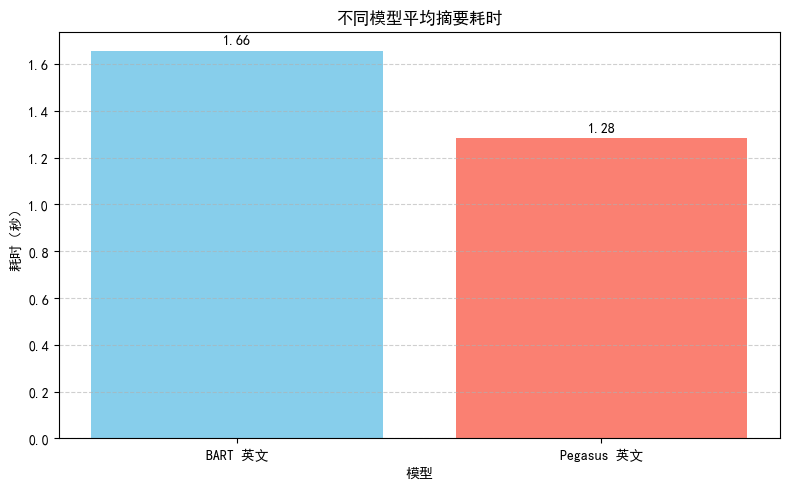

In [5]:
# 构建摘要透视表
pivot = df.pivot(index="模型", columns="语言场景", values="摘要")

# 绘制耗时柱状图
avg_time = df.groupby("模型")["耗时(秒)"].mean().reset_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_time["模型"], avg_time["耗时(秒)"], color=["skyblue", "salmon"])
plt.title("不同模型平均摘要耗时")
plt.ylabel("耗时（秒）")
plt.xlabel("模型")
plt.grid(axis="y", linestyle="--", alpha=0.6)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

